<a href="https://colab.research.google.com/github/PiDilc/PublicTransportTracking/blob/ptt_dwell_time/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install geopandas
#!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: 

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
!conda install anaconda-client -n base

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::osmnx==1.3.0=pyhd8ed1ab_0
  - conda-forge/noarch::geopandas==0.12.2=pyhd8ed1ab_0
  - conda-forge/noarch::geopandas-base==0.12.2=pyha770c72_0
- \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - anaconda-client


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.11.2     |     pyhd8ed1ab_0          68 KB  conda-forge
    anaconda-project-0.11.1    |     pyhd8ed1ab_0         225 KB  conda-forge
    clyent-1.2.2               |             py_1           9 KB  conda-forge
    conda-pa

In [3]:
import condacolab
condacolab.check()


✨🍰✨ Everything looks OK!


In [4]:
!conda install -c conda-forge geopandas osmnx

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.



In [5]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import geopandas as gpd
import osmnx as ox 
from pyproj import CRS
import matplotlib.pyplot as plt


In [7]:
census_data = pd.read_csv("/content/drive/MyDrive/SAPS2016_SA2017.csv")
census_polygons = gpd.read_file("/content/drive/MyDrive/Limerick_Bus_Small_Areas (1).gpkg")

PROJ: proj_create_from_database: /usr/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.


In [8]:
census_data.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_TC,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T
0,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,Small Area,4,0,2,2,1,5,7,...,128,97,27,4,128,83,20,23,2,128
1,4c07d11e-123a-851d-e053-ca3ca8c0ca7f,SA2017_017002001,Small Area,3,2,2,3,1,1,3,...,114,86,26,2,114,72,18,23,1,114
2,4c07d11e-14b1-851d-e053-ca3ca8c0ca7f,SA2017_017002002,Small Area,4,2,4,3,4,4,4,...,138,108,26,4,138,114,5,16,3,138
3,4c07d11e-14b2-851d-e053-ca3ca8c0ca7f,SA2017_017002003,Small Area,2,2,0,1,1,1,0,...,103,80,19,4,103,74,13,15,1,103
4,4c07d11d-f709-851d-e053-ca3ca8c0ca7f,SA2017_017003001,Small Area,2,1,0,5,2,0,1,...,83,55,24,4,83,50,10,21,2,83


In [9]:
census_polygons.head()

,OBJECTID_1,OBJECTID,GUID,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,...,EDNAME,SA_PUB2011,SMALL_AREA,GEOGID,AREA,CHANGECODE,ESRI_OID,SHAPE_Leng,SHAPE_Area,geometry
0,14850,14850,4c07d11e-2f01-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,Shannon B,128034002/128034003,128034002,A128034002/128034003,0,2,14850,940.447009,39650.598293,"MULTIPOLYGON (((557867.779 656973.207, 557805...."
1,18252,18252,4c07d11e-3bbd-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,Dock A,128014001,128014001,A128014001,0,0,18252,204.588408,2429.730022,"MULTIPOLYGON (((557111.332 656773.368, 557108...."
2,18253,18253,4c07d11e-3bbe-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,Custom House,128013002,128013002,A128013002,0,0,18253,344.893860,6552.516538,"MULTIPOLYGON (((558072.762 657273.598, 558067...."
3,14908,14908,4c07d11e-2e91-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,Ballycummin,127018029,127018029,A127018029,0,0,14908,1235.187915,53388.119620,"MULTIPOLYGON (((556038.095 653515.310, 556052...."
4,14909,14909,4c07d11e-2e92-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,Ballycummin,127018021,127018021,A127018021,0,0,14909,887.471649,41504.564267,"MULTIPOLYGON (((556176.851 653222.142, 556197...."


In [10]:
joined_data = census_polygons.merge(census_data, on="GUID") 
joined_data.head()

,OBJECTID_1,OBJECTID,GUID,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,...,T15_1_TC,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T
0,14850,14850,4c07d11e-2f01-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,98,46,36,16,98,47,11,24,16,98
1,18252,18252,4c07d11e-3bbd-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,79,47,26,6,79,51,8,12,8,79
2,18253,18253,4c07d11e-3bbe-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,68,38,26,4,68,42,5,18,3,68
3,14908,14908,4c07d11e-2e91-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,107,87,20,0,107,85,6,16,0,107
4,14909,14909,4c07d11e-2e92-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE051,Mid-West,LK,...,101,81,18,2,101,91,3,6,1,101


<Axes: >

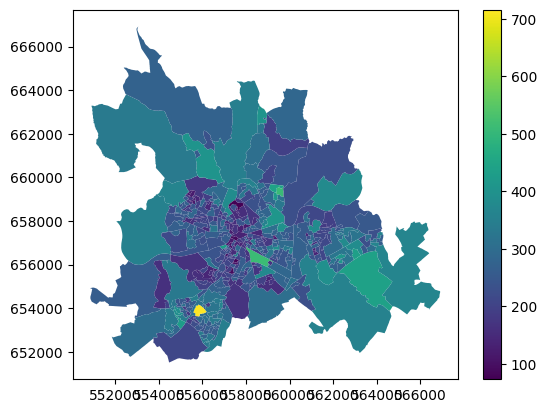

In [11]:
joined_data.plot("T1_1AGETT", legend= True)

In [14]:
place = "Limerick"


buildings = ox.geometries_from_place(place, tags={'building': True})
buildings = buildings.loc[buildings.geometry.type=='Polygon']

#buildings = buildings.merge(census_data, on="osm_id")


In [16]:
lk_network = ox.graph_from_place(place, network_type="all")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

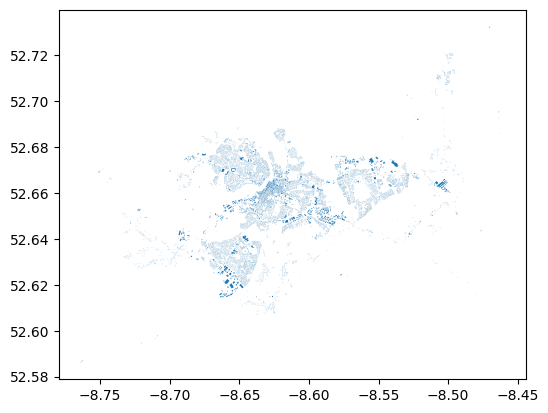

In [15]:
buildings.plot()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

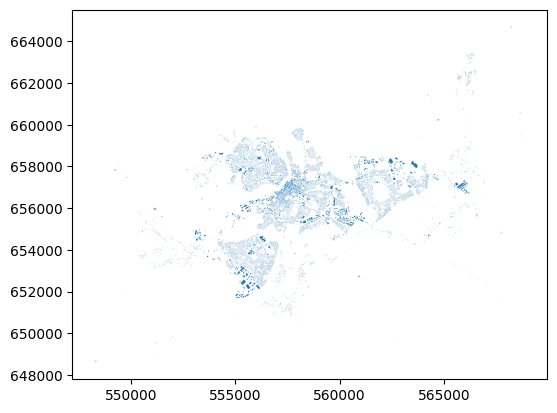

In [18]:
buildings = buildings.to_crs("epsg:2157")
buildings.plot()

In [41]:
inter = gpd.overlay(buildings, joined_data, how= 'intersection')

<Axes: >

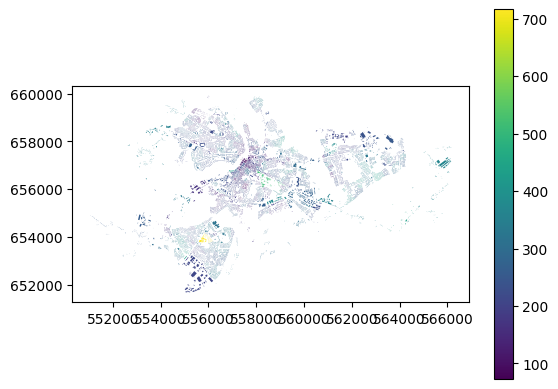

In [22]:
inter.plot("T1_1AGETT", legend= True)

In [45]:
cols = ['geometry', 'T1_1AGETT', 'GUID']
buildings_by_small_area = inter[cols].dissolve(by="T1_1AGETT", as_index=False).set_geometry('geometry')
#buildings_by_small_area = buildings_by_small_area[cols]
buildings_by_small_area.head()

,T1_1AGETT,geometry,GUID
0,73,"MULTIPOLYGON (((557604.247 658596.409, 557602....",4c07d11e-19cf-851d-e053-ca3ca8c0ca7f
1,82,"MULTIPOLYGON (((557385.543 656068.880, 557391....",4c07d11e-1e86-851d-e053-ca3ca8c0ca7f
2,91,"MULTIPOLYGON (((557251.568 655620.481, 557247....",4c07d11e-2edc-851d-e053-ca3ca8c0ca7f
3,92,"MULTIPOLYGON (((557498.053 657169.826, 557509....",4c07d11e-2f3c-851d-e053-ca3ca8c0ca7f
4,106,"MULTIPOLYGON (((557513.880 656088.033, 557571....",4c07d11e-2f6a-851d-e053-ca3ca8c0ca7f


,geometry,T1_1AGETT,GUID
0,"POLYGON ((562537.387 657638.954, 562530.927 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
1,"POLYGON ((562568.716 657442.230, 562570.090 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
2,"POLYGON ((562625.101 657672.950, 562642.283 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
3,"POLYGON ((562635.538 657499.975, 562635.203 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
4,"POLYGON ((562456.138 657601.337, 562459.501 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f


<Axes: >

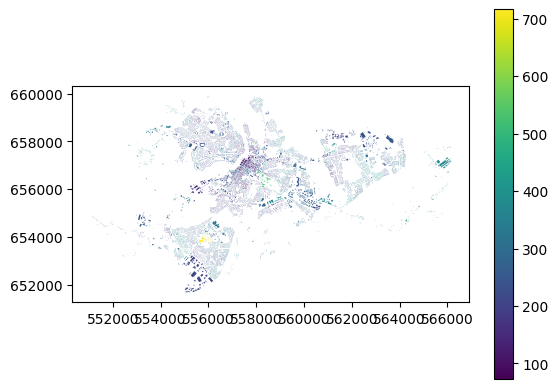

In [46]:
buildings_by_small_area.plot("T1_1AGETT", legend= True)

In [47]:
print (dict(buildings_by_small_area.dtypes))

{'T1_1AGETT': dtype('int64'), 'geometry': <geopandas.array.GeometryDtype object at 0x7f07809e5490>, 'GUID': dtype('O')}


,geometry,T1_1AGETT,GUID
0,"POLYGON ((562537.387 657638.954, 562530.927 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
1,"POLYGON ((562568.716 657442.230, 562570.090 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
2,"POLYGON ((562625.101 657672.950, 562642.283 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
3,"POLYGON ((562635.538 657499.975, 562635.203 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f
4,"POLYGON ((562456.138 657601.337, 562459.501 65...",330,4c07d11d-f99a-851d-e053-ca3ca8c0ca7f


In [48]:
buildings_by_small_area.to_file('/content/drive/MyDrive/Colab Notebooks/buildings_by_small_area.gpkg', driver='GPKG')  